In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [17]:
plt.rcParams['font.family'] = 'NanumGothic'

In [18]:
df = pd.read_csv("보험데이터_한글.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   청구번호       17998 non-null  int64  
 1   연령         17998 non-null  int64  
 2   성별         17998 non-null  object 
 3   결혼여부       17993 non-null  float64
 4   안전점수       17998 non-null  int64  
 5   연봉         17998 non-null  int64  
 6   고학력여부      17998 non-null  int64  
 7   주소변경여부     17998 non-null  int64  
 8   거주형태       17998 non-null  object 
 9   우편번호       17998 non-null  int64  
 10  청구일자       17998 non-null  object 
 11  청구요일       17998 non-null  object 
 12  사고지역       17998 non-null  object 
 13  과거청구횟수     17998 non-null  int64  
 14  사고당시목격자여부  17866 non-null  float64
 15  신뢰성        17998 non-null  int64  
 16  접수채널       17998 non-null  object 
 17  경창리포트여부    17998 non-null  int64  
 18  지급보험료      17981 non-null  float64
 19  자동차년식      17990 non-null  float64
 20  자동차타입 

In [20]:
df.isna().sum()

청구번호           0
연령             0
성별             0
결혼여부           5
안전점수           0
연봉             0
고학력여부          0
주소변경여부         0
거주형태           0
우편번호           0
청구일자           0
청구요일           0
사고지역           0
과거청구횟수         0
사고당시목격자여부    132
신뢰성            0
접수채널           0
경창리포트여부        0
지급보험료         17
자동차년식          8
자동차타입          0
자동차가격          0
자동차컬러          0
자동차무게          0
사기여부           0
dtype: int64

In [21]:
df = df.dropna(subset=["지급보험료",
                       "사고당시목격자여부",
                       '결혼여부',
                       "자동차년식"])

In [22]:
## 선 순위 : 연령, 결혼, (연봉, 거주형태), 목격자여부, 신뢰성, 과거청구횟수
## 후 순위 : 지급 보험료, 고학력여부, 사고지역

In [23]:
df.shape

(17836, 25)

In [24]:
df.tail(3)

,청구번호,연령,성별,결혼여부,안전점수,연봉,고학력여부,주소변경여부,거주형태,우편번호,...,신뢰성,접수채널,경창리포트여부,지급보험료,자동차년식,자동차타입,자동차가격,자동차컬러,자동차무게,사기여부
17995,29997,27,F,1.0,81,32953,0,1,Rent,15012,...,1,Online,1,2225.803056,5.0,Medium,64974.36959,black,44536.25506,0
17996,29999,52,F,1.0,86,39519,1,0,Own,15026,...,75,Broker,1,9560.744844,3.0,Compact,24983.26811,white,50093.75959,0
17997,30000,61,F,0.0,60,41126,1,0,Rent,50001,...,35,Phone,0,5166.915270,5.0,Medium,19295.97048,blue,15257.21450,0


In [25]:
df['사기여부'].value_counts()

0    15040
1     2796
Name: 사기여부, dtype: int64

C:\Users\Creation\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='연령', ylabel='Density'>

C:\Users\Creation\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Creation\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


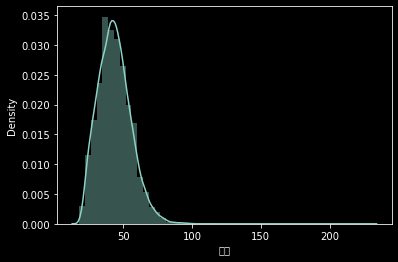

In [26]:
%matplotlib inline
plt.style.use(["dark_background"])
sns.distplot(df["연령"])

In [27]:
## 구간화 (구룹핑, 클러스터링)

df["연령구간"]=np.where(df["연령"]<=30,1,2)

In [35]:
df["연령구간2"]=np.where(df["연령"]<=30,1,
                     np.where(df["연령"]<=45,2,3))

In [135]:
df["연령구간4"]=df["연령"]//10*10

In [136]:
# ▶ 구간화에 따른 청구 사기율
v =  '연령구간4'

# ▶ 1단계
df_tran = pd.DataFrame(df.groupby([v, '사기여부'])['청구번호'].count()).reset_index()
df_tran.head(5)

# ▶ 2단계
df_pivot = pd.pivot_table(df_tran,               # 피벗할 데이터프레임
                      index = v,           # 행 위치에 들어갈 열
                      columns = '사기여부',         # 열 위치에 들어갈 열
                      values = '청구번호')   # 데이터로 사용할 열 
# ▶ 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ 4단계
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,연령구간4,0,1,ratio
0,10,11.0,6.0,35.3
1,20,1728.0,313.0,15.3
2,30,3947.0,799.0,16.8
3,40,4668.0,1190.0,20.3
4,50,3177.0,323.0,9.2
5,60,1114.0,123.0,9.9
6,70,307.0,35.0,10.2
7,80,67.0,2.0,2.9
8,90,17.0,4.0,19.0
9,100,1.0,NaN,NaN


In [145]:
df["연령구간4"]=np.where(df["연령"]<20,1,
                     np.where(df["연령"]<=40,2,
                              np.where(df["연령"]<=60,3,
                                np.where(df["연령"]<=80,4,
                                        np.where(df["연령"]<=100,5,6)))))

In [108]:
df["연령구간3"].value_counts()

40     5858
30     4746
50     3500
20     2041
60     1237
70      342
80       69
90       21
10       17
200       1
130       1
100       1
220       1
110       1
Name: 연령구간3, dtype: int64

In [37]:
df[['연령',"연령구간","연령구간2"]]

,연령,연령구간,연령구간2
0,46,2,3
1,21,1,1
2,49,2,3
3,58,2,3
4,38,2,2
...,...,...,...
17993,69,2,3
17994,35,2,2
17995,27,1,1
17996,52,2,3


In [146]:
# ▶ 구간화에 따른 청구 사기율
v =  '연령구간4'

# ▶ 1단계
df_tran = pd.DataFrame(df.groupby([v, '사기여부'])['청구번호'].count()).reset_index()
df_tran.head(5)

# ▶ 2단계
df_pivot = pd.pivot_table(df_tran,               # 피벗할 데이터프레임
                      index = v,           # 행 위치에 들어갈 열
                      columns = '사기여부',         # 열 위치에 들어갈 열
                      values = '청구번호')   # 데이터로 사용할 열 
# ▶ 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ 4단계
df_pivot['ratio'] =   round((df_pivot.iloc[:,2] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

,연령구간4,0,1,ratio
0,1,11,6,35.3
1,2,6185,1229,16.6
2,3,7507,1417,15.9
3,4,1262,138,9.9
4,5,72,5,6.5
5,6,3,1,25.0


In [113]:
df.loc[df["연령"]<20]

,청구번호,연령,성별,결혼여부,안전점수,연봉,고학력여부,주소변경여부,거주형태,우편번호,...,자동차년식,자동차타입,자동차가격,자동차컬러,자동차무게,사기여부,연령구간,연령구간2,연령구간3,연령구간4
257,434,19,F,0.0,83,29447,1,1,Rent,15004,...,6.0,Medium,40025.701100,red,29630.23893,1,1,1,10,1
645,1063,19,M,1.0,80,29441,0,1,Rent,85024,...,7.0,Large,21698.172170,blue,40270.56014,0,1,1,10,1
1428,2362,19,M,1.0,65,29444,0,0,Rent,15030,...,4.0,Compact,17421.742280,red,16881.83961,0,1,1,10,1
3144,5263,19,M,0.0,89,29451,0,0,Rent,20134,...,9.0,Large,13123.972290,silver,30740.55879,1,1,1,10,1
5570,9218,19,F,1.0,67,29434,1,1,Rent,20121,...,4.0,Compact,11518.122800,gray,20145.80299,0,1,1,10,1
5690,9421,19,M,1.0,64,29453,0,1,Rent,20137,...,0.0,Medium,8684.645496,silver,62870.15137,1,1,1,10,1
6074,10047,19,F,1.0,90,29444,1,1,Rent,15006,...,4.0,Medium,22929.878380,gray,12313.35427,0,1,1,10,1
6785,11229,18,F,1.0,69,28906,0,0,Rent,20139,...,5.0,Large,6143.200906,other,11686.89842,0,1,1,10,1
6880,11400,19,F,1.0,85,29420,1,0,Rent,15028,...,1.0,Medium,32306.726520,other,18462.02563,0,1,1,10,1
9262,15402,19,M,0.0,23,29450,0,1,Own,15059,...,8.0,Medium,22259.446080,black,34474.88729,1,1,1,10,1
